## Problem statement

**The problem was to classify the people based on their annual income into two groups which are <=50K per annum or >50K per annum. We can do this by taking the various parameter like their age , education etc., into cosideration. We are going to train our model with the data already present with us to predict the target variable when we give independent parameters.**

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
data = pd.read_csv('dataset/train.csv') # Reading the dataset

### Analysing the data

In [3]:
print(f'Shape of the dataset : {data.shape}')
# Identifying the shape of the data which gives information related to number of records present in the dataset. 

Shape of the dataset : (32560, 16)


- **Dataset consits of 32560 records and 16 columns in which 15 were the features and 1 is target varable**

In [4]:
data.columns # Lets check the feature and target variables present in the dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'earn', 'id'],
      dtype='object')

**We can see that the features present in the dataset reveals information related to the person like age, gender, education qualification and occupation etc., which helps the model to differentiate the data into different calasses.**

### Lets see some sample data

In [5]:
data.head(3) # Prints the 3 records from the dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earn,id
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,2
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,3


**We can observe from the above sample data that some of the features are string/object and some of them are int and float. We need to convert this string/object columns into int which can be easily understood by model.** 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  earn            32560 non-null  int64 
 15  id              32560 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.0+ MB


**We can observe here that there is no nan values in the dataset.**

In [7]:
data.describe() # Describes the dataset by providing some useful information

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,earn,id
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817,16280.500000
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586,9399.406719
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,8140.750000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,16280.500000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000,24420.250000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,32560.000000


**Describe method will only consider the integer datatype columns and provide information related to them to help understand the data better.**

### Analysing the target variable

In [8]:
target = 'earn'
data[target].value_counts()

0    24719
1     7841
Name: earn, dtype: int64

**We can observe that target variable has two classes in them '0' and '1'. Dataset is not well balanced. So, we need to use stratify while splitting the data into train and test for better model.**

### Visualizing dataset

Text(0.5, 1.0, 'sex')

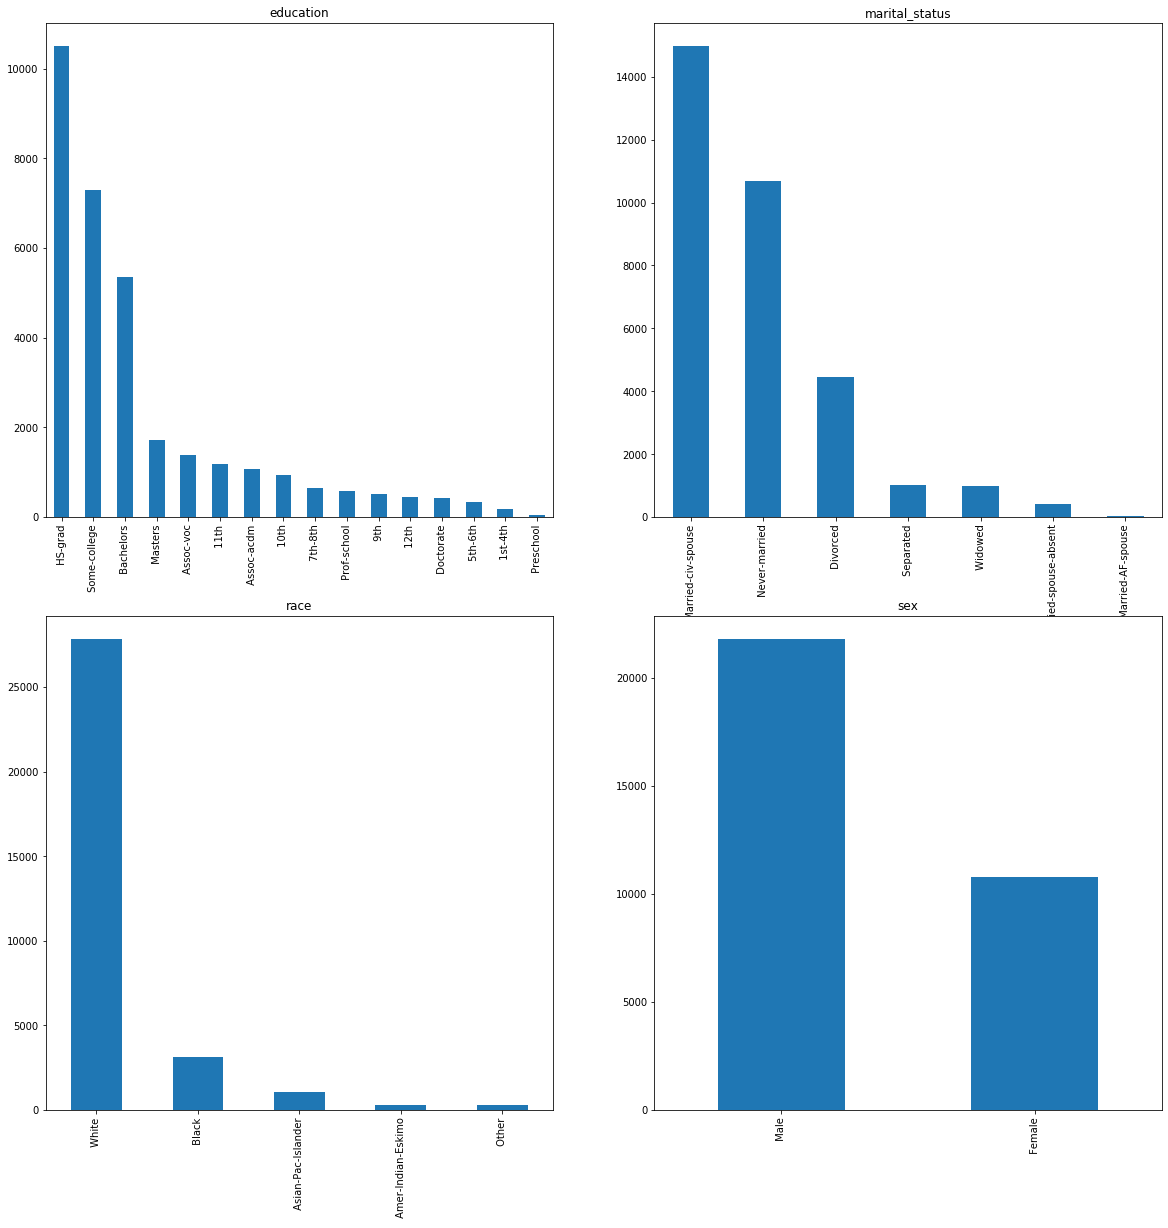

In [9]:
# Lets varify the distribution of "education", "marital_status", "race" and "sex" in the dataset
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
data['education'].value_counts().plot(ax=axes[0, 0], kind='bar')
axes[0, 0].set_title('education')
data['marital_status'].value_counts().plot(ax=axes[0,1], kind='bar')
axes[0, 1].set_title('marital_status')
data['race'].value_counts().plot(ax=axes[1,0], kind='bar')
axes[1, 0].set_title('race')
data['sex'].value_counts().plot(ax=axes[1,1], kind='bar')
axes[1, 1].set_title('sex')

**OBSERVATIONS**
   - In the above plot we can see the distribution of some of the features in teh dataaset.
   - We can observe that only some education types have more distribution in the dataset.
   - We have more data for white race compared to all other races.
   - The distribution of Male is more in dataset compared to the female count.
   - Even in marital status the types are not well distributed.

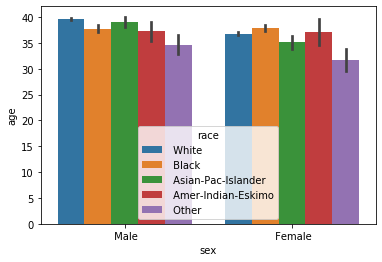

In [10]:
# Lets check the distribution of age over different sex
sns.barplot(x='sex', y='age', data=data, hue='race')

### Preprocessing the dataset

##### Lets convert all categorical columns into int using Label Encoding

In [11]:
categorical_features=data.select_dtypes(include=[np.object])

In [12]:
categorical_features.columns # we can see the list of features which are categorical

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [13]:
for c in categorical_features:
    print(c)
    le = LabelEncoder() 
    data[c] = le.fit_transform(list(data[c].values))

workclass
education
marital_status
occupation
relationship
race
sex
native_country


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int64
 2   fnlwgt          32560 non-null  int64
 3   education       32560 non-null  int64
 4   education_num   32560 non-null  int64
 5   marital_status  32560 non-null  int64
 6   occupation      32560 non-null  int64
 7   relationship    32560 non-null  int64
 8   race            32560 non-null  int64
 9   sex             32560 non-null  int64
 10  capital_gain    32560 non-null  int64
 11  capital_loss    32560 non-null  int64
 12  hours_per_week  32560 non-null  int64
 13  native_country  32560 non-null  int64
 14  earn            32560 non-null  int64
 15  id              32560 non-null  int64
dtypes: int64(16)
memory usage: 4.0 MB


**Now we can see that all the dtypes in the dataset is converted into "int64". THis is useful for the model.**

### Lets check the correlation betweent he features in the dataset

In [15]:
data.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earn,id
age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039,0.001288
workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645,-0.000051
fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481,-0.003210
education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311,-0.006715
education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182,-0.001019
marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295,-0.000352
occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448,-0.001500
relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924,-0.004070
race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853,-0.005310
sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995,-0.002434


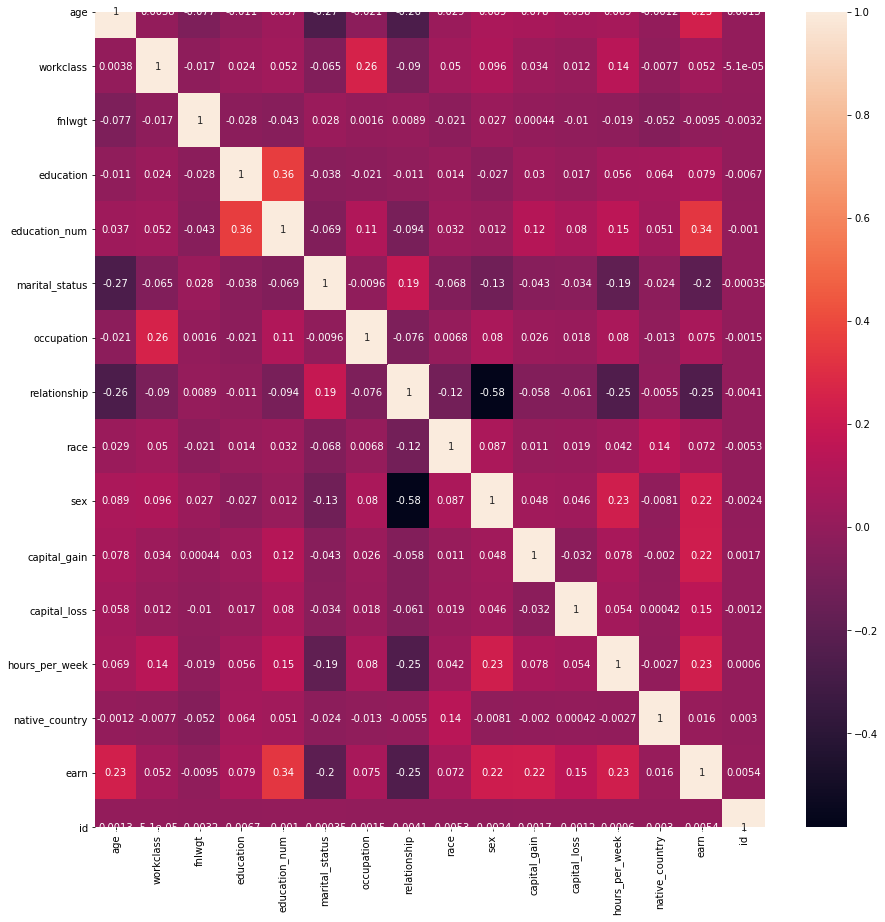

In [16]:
# Lets see the heatmap for the correlation
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**From the heatmap we don't observe any specific correlation between the features (or) between feature and target variable.**

### Lets split the data into train and test sets

In [17]:
features = list(data.columns)
print(len(features))
features = [i for i in features if i!=target]
print(len(features))

16
15


In [18]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (26048, 16)
Shape of train dataset : (6512, 16)


In [19]:
train[target].value_counts()

0    19775
1     6273
Name: earn, dtype: int64

In [20]:
test[target].value_counts()

0    4944
1    1568
Name: earn, dtype: int64

**As we used startify while performing train test split the distribution of classes in the train and test data is similar.**

**Now the model will not overfit on one class.**

In [21]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Lets perform the Logistic regression

In [22]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Logistic Regression is : {accuracy*100}%')

The accuracy of the Logistic Regression is : 79.3918918918919%


In [23]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,4709,1107
1,235,461


### Training the model using Support Vector Machine

In [24]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the SVM is : {accuracy*100}%')#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is : 75.92137592137593%


In [25]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,4944,1568
1,0,0


### Trianing the model using the Decision Tree

In [26]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 81.86425061425061%


In [27]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,4331,568
1,613,1000


### Trinaing the model using KNN

In [28]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the KNN is : {accuracy*100}%')


The accuracy of the KNN is : 74.47788697788698%


In [29]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,4408,1126
1,536,442


### OBSERVATIONS

- **The dataset is not well balanced so there is a chance that model may overfit on perticular class.**

- **We used stratify technique while splitting the dataset into train and test.**

- **Even though we can observe that class '0' is predicted for more number of records which usually is class '1'.**

- **To tackle this overfitting issue we can create more records for the class '1' adn balance the dataset.**

- **We Can observe that the Decision Tree performed better compared to all other models.**

- **We can improve the model by preprocessing the data and creating some new features based on the existing ones.**

- **We can also perform standard scalar technique to improve the model.**